In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

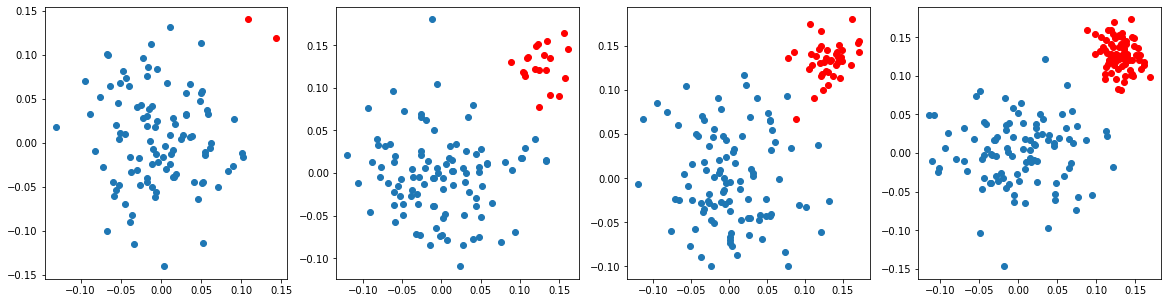

In [ ]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

In [ ]:
def get_data(ratios):
  data_sets = list()
  for i in ratios:
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    d = pd.DataFrame(StandardScaler().fit_transform(X))
    d['y'] = y
    data_sets.append(d)
  return data_sets

# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


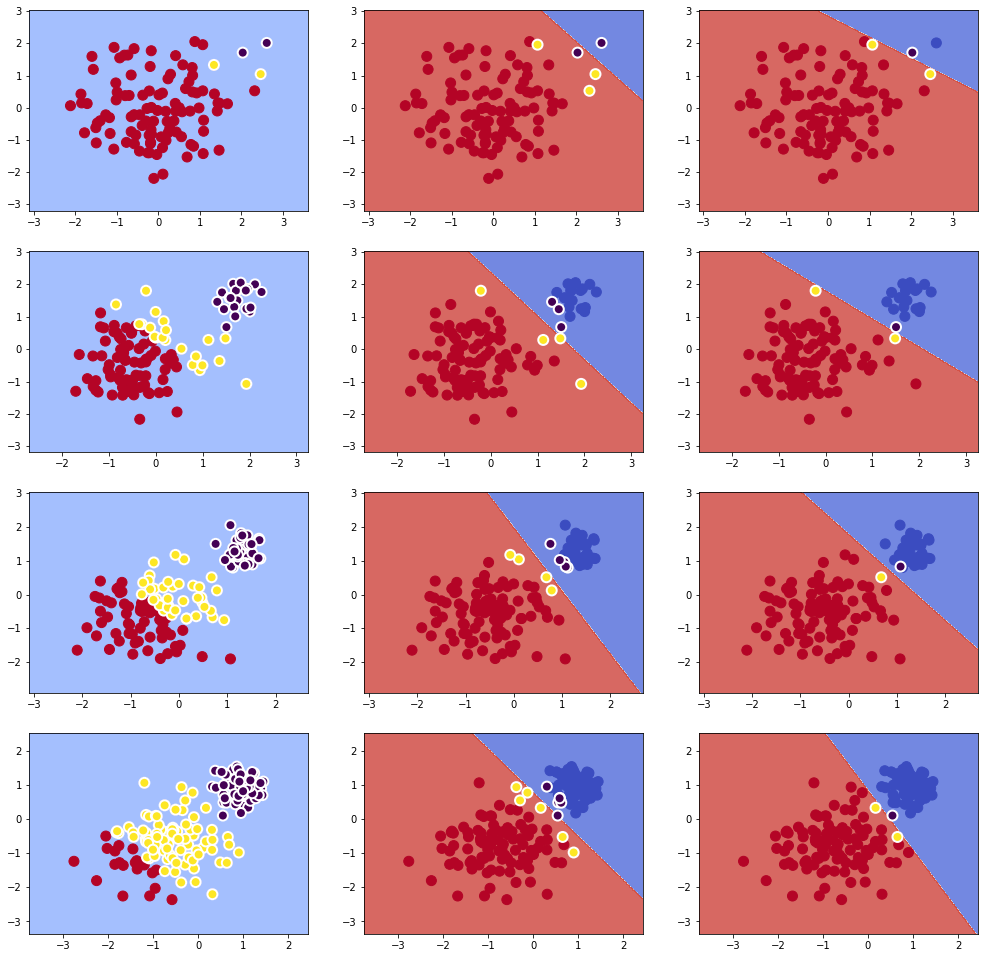

In [ ]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
data = get_data(ratios=ratios)
C = [0.001,1,100]
fig,ax = plt.subplots(len(data),len(C),figsize=(17,17))
for d in range(len(data)):
  X = data[d].iloc[:,:-1]
  y = data[d].iloc[:,-1]
  for cc in range(len(C)):
    clf = SVC(C=C[cc],kernel='linear').fit(X,y)
    ind = clf.support_
    sv = clf.support_vectors_
    xx,yy = make_meshgrid(data[d].iloc[:,0],data[d].iloc[:,1])
    plot_contours(ax[d,cc],clf,xx,yy,cmap=plt.cm.coolwarm, alpha=0.8)
    ax[d,cc].scatter(data[d].iloc[:,0],data[d].iloc[:,1], c=data[d].iloc[:,-1], cmap=plt.cm.coolwarm, s=100, )#edgecolors='k')
    ax[d,cc].scatter(sv[:,0],sv[:,1],c=data[d].iloc[ind,-1], s=100, edgecolors='white',linewidth=2)#,marker="^")

<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 

**OBS:**


When the Regularization parameter was too low i.e 0.001, I didn't notice any hyperplane in the plots for all the combinations of imbalanced dataset i.e [(100,2), (100, 20), (100, 40), (100, 80)] and noticed that the number of support vectors present in both classes is same.
Since less weightage was given to the loss term, we are underfitting implies a high-biased model.

When the Regularization parameter is 1, we start noticing the hyperplanes. From an optimization point of view, we try to maximize the margin but from the above plots, we see the misclassification of points which I think is due to the imbalance of the dataset. when the ratio b/w +ve and -ve points start to increase the model is trying its best to maximize the margin.

when the Regularization parameter is 100, we give more weightage to loss term implies high variance model i.e overfitting, our tendency to make mistakes on train data decreases. Even though the ratio b/w +ve and -ve points start to increase we might overfit.

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

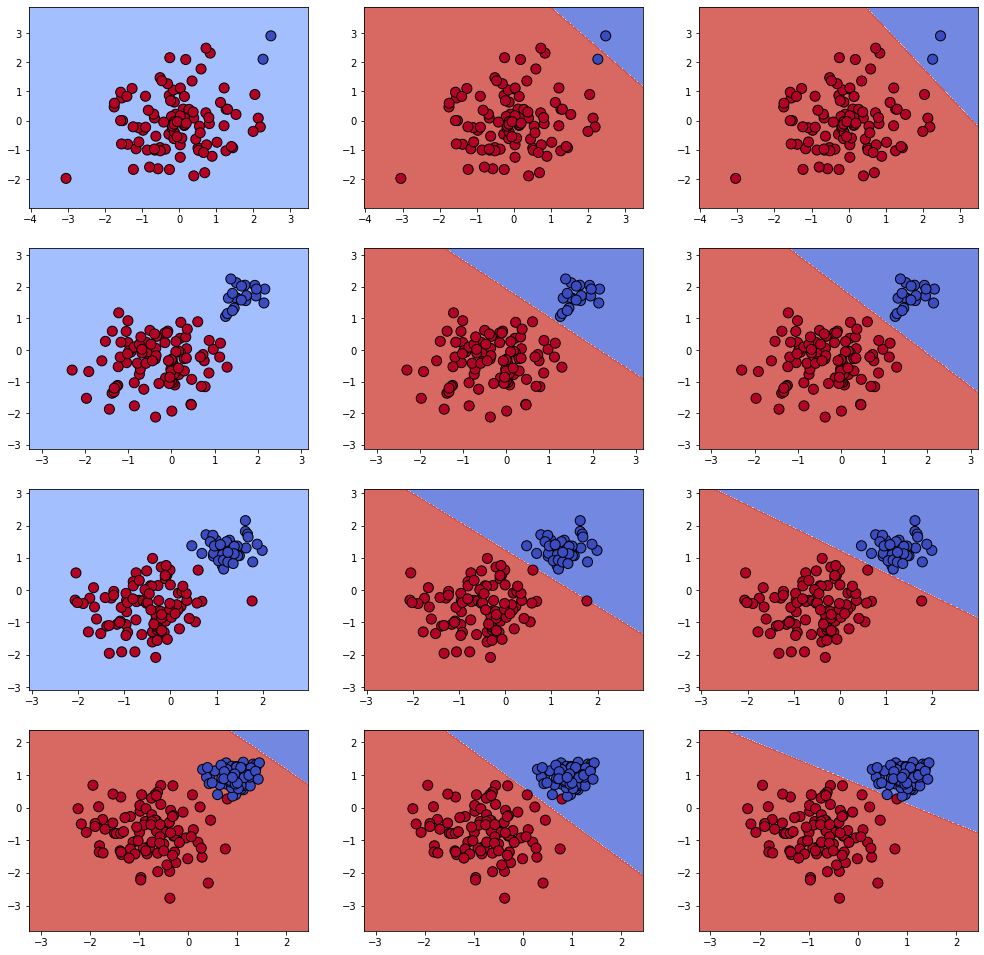

In [ ]:

ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
data = get_data(ratios=ratios)
C = [0.001,1,100]
fig,ax = plt.subplots(len(data),len(C),figsize=(17,17))
for d in range(len(data)):
  X = data[d].iloc[:,:-1]
  y = data[d].iloc[:,-1]
  for cc in range(len(C)):
    #clf = SVC(C=C[cc],kernel='linear').fit(X,y)
    #ind = clf.support_
    #sv = clf.support_vectors_

    clf = LogisticRegression(C=C[cc]).fit(X,y)
    xx,yy = make_meshgrid(data[d].iloc[:,0],data[d].iloc[:,1])
    plot_contours(ax[d,cc],clf,xx,yy,cmap=plt.cm.coolwarm, alpha=0.8)
    ax[d,cc].scatter(data[d].iloc[:,0],data[d].iloc[:,1], c=data[d].iloc[:,-1], cmap=plt.cm.coolwarm, s=100, edgecolors='k')
    #ax[d,cc].scatter(sv[:,0],sv[:,1],c='yellow', s=100, edgecolors='k',)#marker="^")